In [1]:
import pandas as pd
import numpy as np
from pyalex import Works
import pyalex
pyalex.config.email = "tarakomarecity@gmail.com"

flatten2 = lambda l: [item for sublist in l if sublist == sublist for item in sublist]

In [2]:
pager = Works().filter(concepts={"id": "C3020079912"})\
            .select(["id", "title", "publication_year", "authorships", "referenced_works"]).paginate(per_page=200, n_max=None)

works_json = []
for page in pager:
    for item in page:
        works_json.append(item)
    print(len(works_json))


200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
7800
8000
8200
8400
8600
8800
9000
9200
9400
9600
9800
10000
10200
10400
10600
10800
11000
11200
11400
11600
11800
12000
12200
12400
12600
12800
13000
13200
13400
13600
13800
14000
14200
14400
14600
14800
15000
15200
15400
15600
15800
16000
16200
16400
16600
16800
17000
17200
17400
17600
17800
18000
18200
18400
18600
18800
19000
19200
19400
19600
19800
20000
20200
20400
20571
20571


In [3]:
works_json

[{'id': 'https://openalex.org/W2068535052',
  'title': 'Brain Serotonin Content: Physiological Dependence on Plasma Tryptophan Levels',
  'publication_year': 1971,
  'authorships': [{'author_position': 'first',
    'author': {'id': 'https://openalex.org/A5082110200',
     'display_name': 'John D. Fernstrom',
     'orcid': None},
    'institutions': [{'id': 'https://openalex.org/I63966007',
      'display_name': 'Massachusetts Institute of Technology',
      'ror': 'https://ror.org/042nb2s44',
      'country_code': 'US',
      'type': 'education',
      'lineage': ['https://openalex.org/I63966007']}],
    'countries': ['US'],
    'is_corresponding': False,
    'raw_author_name': 'John D. Fernstrom',
    'raw_affiliation_string': 'Department of Nutrition and Food Science, Massachusetts Institute of Technology, Cambridge 02139',
    'raw_affiliation_strings': ['Department of Nutrition and Food Science, Massachusetts Institute of Technology, Cambridge 02139']},
   {'author_position': 'last

In [4]:
years = pd.Series(
    {work['id']: work['publication_year'] for work in works_json},
    name='year'
)
years.index.name = 'eid'

citations_data = []
for work in works_json:
    target_id = work['id']
    for referenced_work in work['referenced_works']:
        citations_data.append({'source': referenced_work, 'target': target_id})
citations_df = pd.DataFrame(citations_data)

team_sizes = pd.Series(
    {work['id']: len(work['authorships']) for work in works_json},
    name='team_size'
)
team_sizes.index.name = 'eid'

display(years, citations_df, team_sizes)

eid
https://openalex.org/W2068535052    1971
https://openalex.org/W2115473091    1999
https://openalex.org/W1940800221    2000
https://openalex.org/W2078414113    1992
https://openalex.org/W2025726242    1972
                                    ... 
https://openalex.org/W587649530     1993
https://openalex.org/W598243343     1993
https://openalex.org/W793123249     1993
https://openalex.org/W871582284     1993
https://openalex.org/W953855710     1993
Name: year, Length: 20570, dtype: int64

source                            target
0       https://openalex.org/W1462472419  https://openalex.org/W2068535052
1       https://openalex.org/W1631800549  https://openalex.org/W2068535052
2       https://openalex.org/W1899655661  https://openalex.org/W2068535052
3       https://openalex.org/W1965304190  https://openalex.org/W2068535052
4       https://openalex.org/W1966343701  https://openalex.org/W2068535052
...                                  ...                               ...
169050  https://openalex.org/W2203146091   https://openalex.org/W953855710
169051  https://openalex.org/W2396443147   https://openalex.org/W953855710
169052  https://openalex.org/W2401079072   https://openalex.org/W953855710
169053  https://openalex.org/W2411155409   https://openalex.org/W953855710
169054  https://openalex.org/W2418775590   https://openalex.org/W953855710

[169055 rows x 2 columns]

eid
https://openalex.org/W2068535052    2
https://openalex.org/W2115473091    7
https://openalex.org/W1940800221    9
https://openalex.org/W2078414113    3
https://openalex.org/W2025726242    2
                                   ..
https://openalex.org/W587649530     5
https://openalex.org/W598243343     3
https://openalex.org/W793123249     4
https://openalex.org/W871582284     2
https://openalex.org/W953855710     6
Name: team_size, Length: 20570, dtype: int64

In [5]:
def citation_groupby(df_citation):
    '''source,targetのDataFrameを引用先，引用元ごとにgroupby
    
    input: source,targetをcolumnにもつedgeのDataFrame

    index: eid
    source: indexが引用先となる論文群(新)
    target: indexが引用元となる論文群(旧)
    '''
    
    citations_source_gp = df_citation.groupby('source').agg(list)
    citations_target_gp = df_citation.groupby('target').agg(list)
    df_citation_gp = pd.concat([citations_source_gp,citations_target_gp],axis = 1)
    return df_citation_gp

citations_gb = citation_groupby(citations_df)
citations_gb

target  \
https://openalex.org/W100005517                  [https://openalex.org/W2058310707]   
https://openalex.org/W100022864   [https://openalex.org/W2315982116, https://ope...   
https://openalex.org/W1000575363                 [https://openalex.org/W1972595335]   
https://openalex.org/W10006180                   [https://openalex.org/W2005282172]   
https://openalex.org/W1000712198                 [https://openalex.org/W1967943568]   
...                                                                             ...   
https://openalex.org/W98482904                                                  NaN   
https://openalex.org/W987626311                                                 NaN   
https://openalex.org/W989585508                                                 NaN   
https://openalex.org/W99570502                                                  NaN   
https://openalex.org/W999615291                                                 NaN   

                                                                             source  
https://openalex.org/W100005517                                                 NaN  
https://openalex.org/W100022864                                                 NaN  
https://openalex.org/W1000575363                                                NaN  
https://openalex.org/W10006180                                                  NaN  
https://openalex.org/W1000712198                                                NaN  
...                                                                             ...  
https://openalex.org/W98482904    [https://openalex.org/W74649421, https://opena...  
https://openalex.org/W987626311   [https://openalex.org/W2035250490, https://ope...  
https://openalex.org/W989585508   [https://openalex.org/W56702614, https://opena...  
https://openalex.org/W99570502    [https://openalex.org/W6754074, https://openal...  
https://openalex.org/W999615291   [https://openalex.org/W77094880, https://opena...  

[126840 rows x 2 columns]

In [6]:
def get_score(node):
    try:
        node_r = set(citations_gb.target.loc[node])
        node_r_c = set(flatten2([citations_gb.source.loc[x] for x in node_r])) - set([node])
        node_c = set(citations_gb.source.loc[node])
        allnodes = node_c | node_r_c
        cite_target = node_c - node_r_c
        cite_targetref = node_r_c - node_c
        cite_target_targetref_both = node_r_c & node_c
        score = (len(cite_target)*1 + len(cite_target_targetref_both)*-1 + len(cite_targetref)*0)/len(allnodes)
        return score
    except:
        return None

In [7]:
#eids = citations_gb.index

#from multiprocessing import Pool
#P = Pool(20)
#res = P.map(get_score,eids)
#P.terminate()
#P.close()
#scores = pd.DataFrame([[eid,re] for eid,re in zip(eids,res)])
#display(scores, scores[scores[1].notna()])

#scores.index = scores[0]
#scores['year'] = scores[0].map(years)
#display(scores)

In [8]:
eids = citations_gb.index

res = []
for eid in eids:
    res.append(get_score(eid))
scores = pd.DataFrame([[eid,re] for eid,re in zip(eids,res)])
display(scores, scores[scores[1].notna()])

scores.index = scores[0]
scores['team_size'] = scores[0].map(team_sizes)
display(scores)

0   1
0        https://openalex.org/W100005517 NaN
1        https://openalex.org/W100022864 NaN
2       https://openalex.org/W1000575363 NaN
3         https://openalex.org/W10006180 NaN
4       https://openalex.org/W1000712198 NaN
...                                  ...  ..
126835    https://openalex.org/W98482904 NaN
126836   https://openalex.org/W987626311 NaN
126837   https://openalex.org/W989585508 NaN
126838    https://openalex.org/W99570502 NaN
126839   https://openalex.org/W999615291 NaN

[126840 rows x 2 columns]

0         1
80       https://openalex.org/W10300892  0.011364
220     https://openalex.org/W111001063  0.145631
280     https://openalex.org/W115300963 -0.164384
287     https://openalex.org/W115808356  0.018605
298     https://openalex.org/W116579494  0.600000
...                                 ...       ...
119506   https://openalex.org/W90287748  0.250000
119578  https://openalex.org/W939283884  0.000000
119579  https://openalex.org/W939827027  0.649746
119601   https://openalex.org/W94842644  0.031250
119706   https://openalex.org/W98958105  0.000000

[2966 rows x 2 columns]

0   1  \
0                                                                        
https://openalex.org/W100005517    https://openalex.org/W100005517 NaN   
https://openalex.org/W100022864    https://openalex.org/W100022864 NaN   
https://openalex.org/W1000575363  https://openalex.org/W1000575363 NaN   
https://openalex.org/W10006180      https://openalex.org/W10006180 NaN   
https://openalex.org/W1000712198  https://openalex.org/W1000712198 NaN   
...                                                            ...  ..   
https://openalex.org/W98482904      https://openalex.org/W98482904 NaN   
https://openalex.org/W987626311    https://openalex.org/W987626311 NaN   
https://openalex.org/W989585508    https://openalex.org/W989585508 NaN   
https://openalex.org/W99570502      https://openalex.org/W99570502 NaN   
https://openalex.org/W999615291    https://openalex.org/W999615291 NaN   

                                  team_size  
0                                            
https://openalex.org/W100005517         NaN  
https://openalex.org/W100022864         NaN  
https://openalex.org/W1000575363        NaN  
https://openalex.org/W10006180          NaN  
https://openalex.org/W1000712198        NaN  
...                                     ...  
https://openalex.org/W98482904          1.0  
https://openalex.org/W987626311         1.0  
https://openalex.org/W989585508         5.0  
https://openalex.org/W99570502          1.0  
https://openalex.org/W999615291         1.0  

[126840 rows x 3 columns]

In [9]:
scores_notna = scores[scores[1].notna() & scores['team_size'].notna()].drop(columns=0)
scores_notna

1  team_size
0                                                   
https://openalex.org/W10300892   0.011364       10.0
https://openalex.org/W111001063  0.145631        6.0
https://openalex.org/W115300963 -0.164384        3.0
https://openalex.org/W115808356  0.018605        0.0
https://openalex.org/W116579494  0.600000        3.0
...                                   ...        ...
https://openalex.org/W90287748   0.250000        1.0
https://openalex.org/W939283884  0.000000        3.0
https://openalex.org/W939827027  0.649746        3.0
https://openalex.org/W94842644   0.031250        3.0
https://openalex.org/W98958105   0.000000        4.0

[2966 rows x 2 columns]

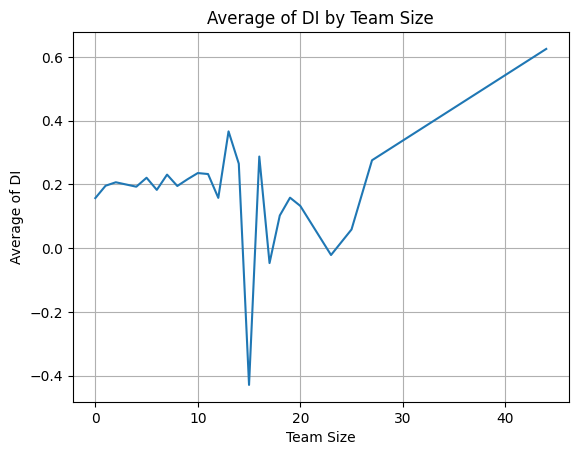

In [10]:
import matplotlib.pyplot as plt

# team_sizeごとにグループ化
grouped_df = scores_notna.groupby('team_size').mean()

# グラフの描画
plt.plot(grouped_df.index, grouped_df[1])
plt.xlabel('Team Size')
plt.ylabel('Average of DI')
plt.title('Average of DI by Team Size')
plt.grid(True)
plt.show()